In [131]:
import os
import json
import math
import torch
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()

import scipy.stats

In [2]:
os.chdir('/home/laetitia/work/OpenELM')

In [9]:
# puzzles_tested = json.load(open('puzzles_dev.json', 'r'))

In [101]:
save_dir = 'logs/compression_progress_test'
load_file_path = 'open_llama_3b_v2-2024-01-15_aces_random_in-context_progress_results.json'
results = json.load(open(os.path.join(save_dir, load_file_path), 'r'))

Text(0.5, 1.0, 'Histogram of the 15 original solution losses')

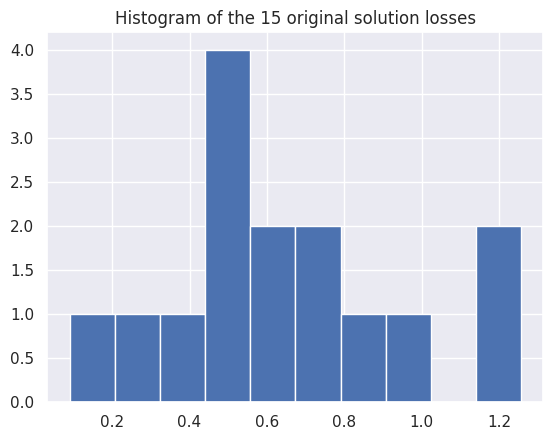

In [102]:
# compare the loss differences with the histogram below
plt.hist(results['original_losses'])
plt.title('Histogram of the 15 original solution losses')

In [103]:
losses = torch.Tensor(results['original_losses'])

In [104]:
def print_puzzle(index):
    print(f'Puzzle {index}')
    print(f'Compression score: {compression_matrix.mean(-1).tolist()[index]}' + "\n\n")
    print('```python')
    print(results["tested_puzzles"][index] + '\n\n' + results["tested_sols"][index])
    print('```')
    print('\n\n')

In [105]:
def print_puzzle_from_dict(p):
    print(p['sat'])
    print(p['sol_header'])
    print(p['sol_bodies'][0])
    print('\n\n')

In [106]:
compression_matrix = torch.Tensor(results['compression_progress'])
distances = torch.Tensor(results['distance_matrix'])
cos_sim = torch.Tensor(results['cosine_sim'])

In [107]:
compression_matrix.shape

torch.Size([14, 15])

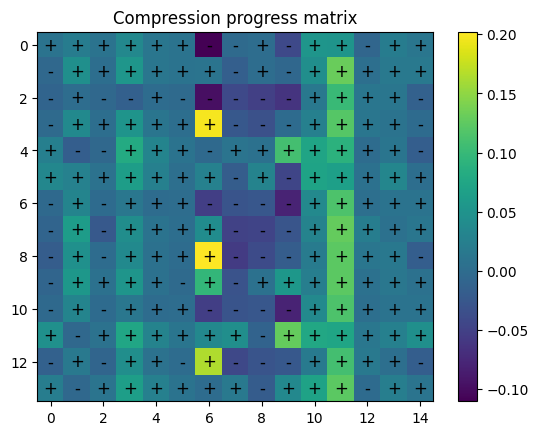

In [109]:
def plot_compression(matrix):
    plt.rcdefaults()
#     matrix[0, 3] = 1
    
    plt.imshow(matrix, cmap='viridis')

    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
    #         print(matrix[i, j] * 1000)
            if matrix[i, j].item() >= 0:
                t = '+'
            else:
                t = '-'
            text = plt.text(j, i, t,
                            ha="center", va="center", color="black", fontsize=12)

    # Display the plot
    plt.colorbar()  # To show the color bar
    plt.title('Compression progress matrix')

    plt.show()
    
    sns.set_theme()

plot_compression(compression_matrix)

In [127]:
# correlation between distance and cp
cp_values = compression_matrix.flatten().tolist()
distances_l = distances.flatten().tolist()
cos_sim_l = cos_sim.flatten().tolist()
cp_norm_values = (compression_matrix / losses.unsqueeze(0)).flatten().tolist()

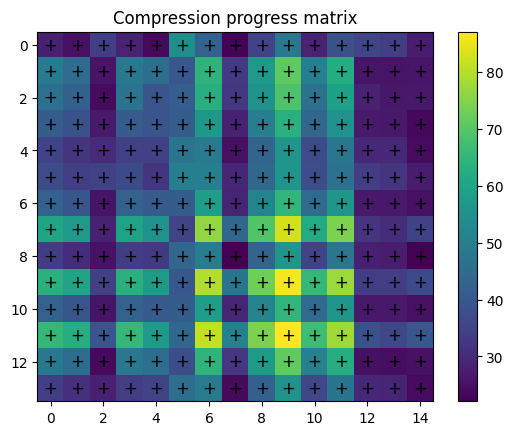

In [111]:
plot_compression(distances)

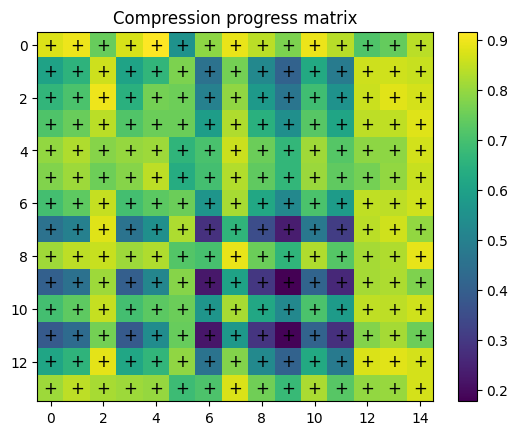

In [112]:
plot_compression(cos_sim)

In [113]:
dev_pi, dev_pi_1  = (distances == 0).nonzero(as_tuple=True)

In [114]:
puzzles = json.load(open('puzzles_dev.json', 'r'))
puzzles_1 = json.load(open('puzzles_dev_1.json', 'r'))

# filter as in the code
puzzles = [p for p in puzzles if p['sol_bodies']]
puzzles_1 = [p for p in puzzles_1 if p['sol_bodies']]
puzzles = [p for p in puzzles if len(p['sat']) + len(p['sol_bodies'][0]) < 1000]
puzzles_1 = [p for p in puzzles_1 if len(p['sat']) + len(p['sol_bodies'][0]) < 1000]

In [115]:
len(puzzles_1)

15

In [116]:
dev_pi

tensor([], dtype=torch.int64)

In [117]:
dev_pi_1

tensor([], dtype=torch.int64)

In [118]:
print_puzzle_from_dict(puzzles_1[-1])

def sat(i: int):
    return len(str(i + 1000)) > len(str(i + 1001))
def sol():
    return -1001





In [119]:
for i, i1 in zip(dev_pi, dev_pi_1):
    print_puzzle_from_dict(puzzles[i])
    print_puzzle_from_dict(puzzles_1[i1])
    print('=' * 80 + '\n\n')

Text(0, 0.5, 'Distance in embedding space')

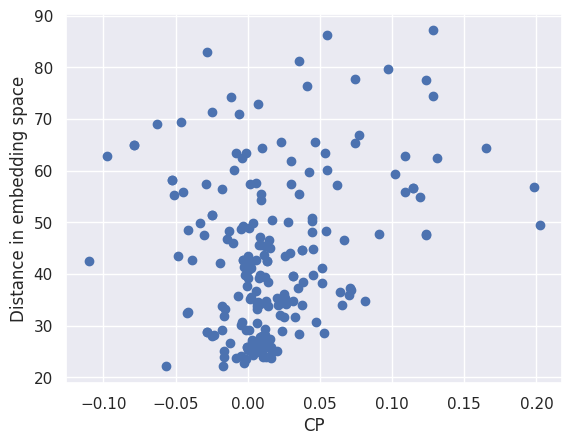

In [120]:
plt.scatter(cp_values, distances_l)
plt.xlabel('CP')
plt.ylabel('Distance in embedding space')

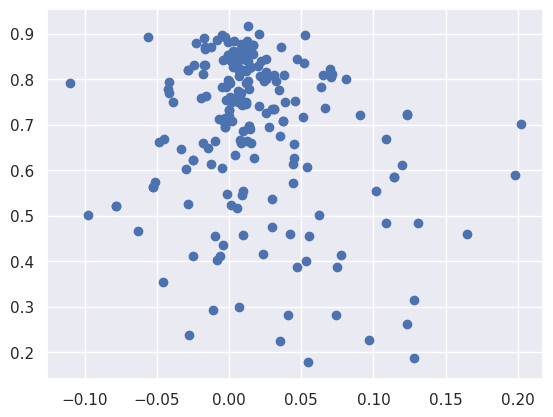

In [121]:
plt.scatter(cp_values, cos_sim_l)

Text(0, 0.5, 'Distance')

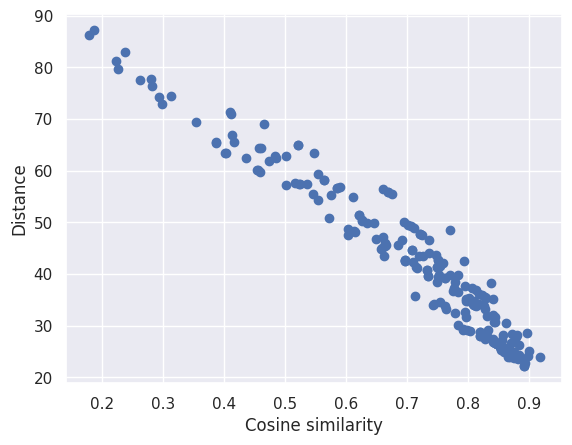

In [122]:
plt.scatter(cos_sim_l, distances_l)
plt.xlabel('Cosine similarity')
plt.ylabel('Distance')

In [123]:
# normalized cp
compression_matrix_normalized = compression_matrix / losses.unsqueeze(0)

Text(0, 0.5, 'Distance in embedding space')

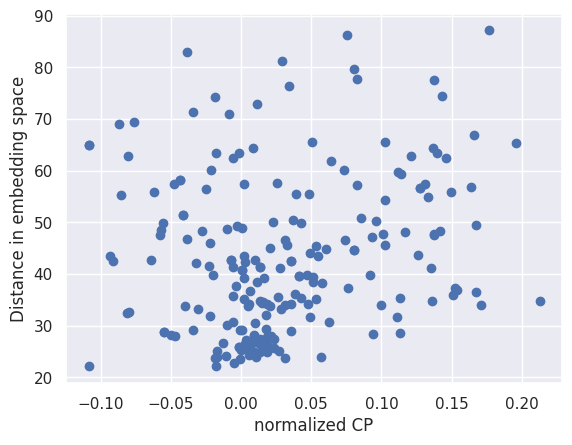

In [124]:
plt.scatter(compression_matrix_normalized.flatten(), distances_l)
plt.xlabel('normalized CP')
plt.ylabel('Distance in embedding space')

In [125]:
# remove diagonal values
cp_values, distances_l, cos_sim_l, cp_norm_values = [], [], [], []
for i in range(compression_matrix.shape[0]):
    for j in range(compression_matrix.shape[1]):
        if i != j and i not in [5, 10] and j not in [5, 10]:
            cp_values.append(compression_matrix[i, j])
            distances_l.append(distances[i, j])
            cos_sim_l.append(cos_sim[i, j])
            cp_norm_values.append(compression_matrix_normalized[i, j])

Text(0, 0.5, 'Distance in embedding space')

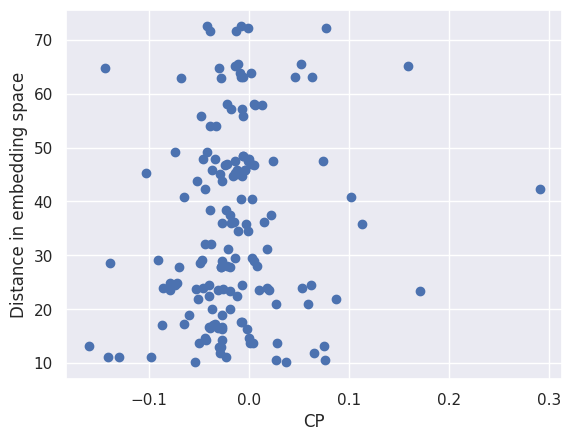

In [95]:
plt.scatter(cp_values, distances_l)
plt.xlabel('CP')
plt.ylabel('Distance in embedding space')

Text(0, 0.5, 'Distance in embedding space')

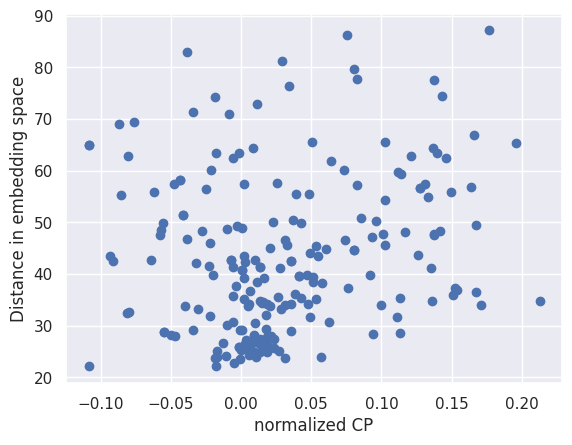

In [129]:
plt.scatter(cp_norm_values, distances_l)
plt.xlabel('normalized CP')
plt.ylabel('Distance in embedding space')

In [128]:
correlation, p_value = scipy.stats.pearsonr(cp_norm_values, distances_l)
print("Pearson's correlation coefficient:", correlation)
print("P-value:", p_value)
rho, p_value = scipy.stats.spearmanr(cp_norm_values, distances_l)
print("Spearman's correlation coefficient:", rho)
print("P-value:", p_value)

Pearson's correlation coefficient: 0.1920267542490055
P-value: 0.005235824847631364
Spearman's correlation coefficient: 0.17900677054650296
P-value: 0.009333172409361695


In [86]:
(70 - distances).pow(2).min()

tensor(1.1736)

In [87]:
((70 - distances).pow(2) < 2).nonzero(as_tuple=True)

(tensor([ 5, 10]), tensor([10,  5]))

In [88]:
print_puzzle(5)

Puzzle 5
Compression score: -0.021130265668034554


```python
def f(n: int, pairs=[[459604, 0], [364611, 68505], [562652, 512251], [668655, 471975], [464486, 626280], [138684, 177065], [163296, 68630], [188271, 104677], [367839, 338137], [73022, 362103], [464143, 484458], [214935, 189299], [643725, 283515], [908210, 541732], [710201, 234839], [854230, 34479], [3288, 675724], [846637, 396244], [0, 2526576]]):
    """
    Given a sequence of integer pairs, p_i, m_i, where \sum p_i-m_i = 0, find the maximum value, over t, of
    p_{t+1} + \sum_{i=1}^t p_i - m_i
    """
    assert sum(p - m for p, m in pairs) == 0, "oo"
    tot = 0
    success = False
    for p, m in pairs:
        tot -= m
        tot += p
        assert tot <= n
        if tot == n:
            success = True
    return success

def g(pairs=[[459604, 0], [364611, 68505], [562652, 512251], [668655, 471975], [464486, 626280], [138684, 177065], [163296, 68630], [188271, 104677], [367839, 338137], [73022, 362103], [464143, 4

In [89]:
print_puzzle(10)

Puzzle 10
Compression score: -0.023059193044900894


```python
def f(n: int, pairs=[[0, 0]]):
    """
    Given a sequence of integer pairs, p_i, m_i, where \sum p_i-m_i = 0, find the maximum value, over t, of
    p_{t+1} + \sum_{i=1}^t p_i - m_i
    """
    assert sum(p - m for p, m in pairs) == 0, "oo"
    tot = 0
    success = False
    for p, m in pairs:
        tot -= m
        tot += p
        assert tot <= n
        if tot == n:
            success = True
    return success

def g(pairs=[[0, 0]]):
    tot = 0
    n = 0
    for p, m in pairs:
        tot += p - m
        if tot > n:
            n = tot
    return n
```





In [100]:
plt.cm.get_cmap(name, n)

NameError: name 'name' is not defined

In [130]:
# color the scatterplots with tested puzzle color

## Interlude: compute number of needed categories

In [135]:
def num_n_among_N(n, N):
    assert N >= n
    return math.factorial(N) / (math.factorial(n) * math.factorial(N - n))

In [136]:
num_n_among_N(2, 3)

3.0

In [137]:
def get_num_cells(n, max_combinations=5):
    return sum([num_n_among_N(i, n) for i in range(max_combinations)])

In [138]:
get_num_cells(10)

176.0

In [144]:
[(n, get_num_cells(n, 5)) for n in range(10, 50)]

[(10, 386.0),
 (11, 562.0),
 (12, 794.0),
 (13, 1093.0),
 (14, 1471.0),
 (15, 1941.0),
 (16, 2517.0),
 (17, 3214.0),
 (18, 4048.0),
 (19, 5036.0),
 (20, 6196.0),
 (21, 7547.0),
 (22, 9109.0),
 (23, 10903.0),
 (24, 12951.0),
 (25, 15276.0),
 (26, 17902.0),
 (27, 20854.0),
 (28, 24158.0),
 (29, 27841.0),
 (30, 31931.0),
 (31, 36457.0),
 (32, 41449.0),
 (33, 46938.0),
 (34, 52956.0),
 (35, 59536.0),
 (36, 66712.0),
 (37, 74519.0),
 (38, 82993.0),
 (39, 92171.0),
 (40, 102091.0),
 (41, 112792.0),
 (42, 124314.0),
 (43, 136698.0),
 (44, 149986.0),
 (45, 164221.0),
 (46, 179447.0),
 (47, 195709.0),
 (48, 213053.0),
 (49, 231526.0)]